# Interview Base Assesment-II Q- 4,Q-7

Question 7 -
Using the data from Question 4, write code to analyze the data and answer the following questions Note -
1. Draw plots to demonstrate the analysis for the following questions for better visualizations

2. Write code comments wherever required for code understanding

Insights to be drawn -

● Get all the Earth meteorites that fell before the year 2000

● Get all the earth meteorites co-ordinates who fell before the year 1970

● Assuming that the mass of the earth meteorites was in kg, get all those whose mass was more
than 10000kg

In [283]:
import requests
import json
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

%matplotlib inline


In [284]:
def download_data(url, file_path):
    response = requests.get(url)
    response.raise_for_status()
    with open(file_path, 'wb') as file:
        file.write(response.content)

def convert_to_csv(json_file, csv_file):
    df = pd.read_json(json_file)
    df.to_csv(csv_file, index=False)

# Define the URL of the JSON data and the desired file paths
json_url = 'https://data.nasa.gov/resource/y77d-th95.json'
json_file_path = 'data.json'
csv_file_path = 'Nasa.csv'

# Download the JSON data
download_data(json_url, json_file_path)

# Convert the JSON data to CSV
convert_to_csv(json_file_path, csv_file_path)

# Print a message when the conversion is complete
print(f"Data converted and saved as '{csv_file_path}'.")

Data converted and saved as 'Nasa.csv'.


In [285]:
df=pd.read_csv('Nasa.csv')

In [286]:
df

,name,id,nametype,recclass,mass,fall,year,reclat,reclong,geolocation,:@computed_region_cbhk_fwbd,:@computed_region_nnqa_25f4
0,Aachen,1,Valid,L5,21.0,Fell,1880-01-01T00:00:00.000,50.77500,6.08333,"{'type': 'Point', 'coordinates': [6.08333, 50....",NaN,NaN
1,Aarhus,2,Valid,H6,720.0,Fell,1951-01-01T00:00:00.000,56.18333,10.23333,"{'type': 'Point', 'coordinates': [10.23333, 56...",NaN,NaN
2,Abee,6,Valid,EH4,107000.0,Fell,1952-01-01T00:00:00.000,54.21667,-113.00000,"{'type': 'Point', 'coordinates': [-113, 54.216...",NaN,NaN
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976-01-01T00:00:00.000,16.88333,-99.90000,"{'type': 'Point', 'coordinates': [-99.9, 16.88...",NaN,NaN
4,Achiras,370,Valid,L6,780.0,Fell,1902-01-01T00:00:00.000,-33.16667,-64.95000,"{'type': 'Point', 'coordinates': [-64.95, -33....",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
995,Tirupati,24009,Valid,H6,230.0,Fell,1934-01-01T00:00:00.000,13.63333,79.41667,"{'type': 'Point', 'coordinates': [79.41667, 13...",NaN,NaN
996,Tissint,54823,Valid,Martian (shergottite),7000.0,Fell,2011-01-01T00:00:00.000,29.48195,-7.61123,"{'type': 'Point', 'coordinates': [-7.61123, 29...",NaN,NaN
997,Tjabe,24011,Valid,H6,20000.0,Fell,1869-01-01T00:00:00.000,-7.08333,111.53333,"{'type': 'Point', 'coordinates': [111.53333, -...",NaN,NaN
998,Tjerebon,24012,Valid,L5,16500.0,Fell,1922-01-01T00:00:00.000,-6.66667,106.58333,"{'type': 'Point', 'coordinates': [106.58333, -...",NaN,NaN


## Data Cleaning

In [287]:
import klib #cleaned the data using klib library

In [288]:
dfc=df.copy()
dfc=klib.data_cleaning(dfc)

Long column names detected (>25 characters). Consider renaming the following columns ['at_computed_region_cbhk_fwbd', 'at_computed_region_nnqa_25f4'].
Shape of cleaned data: (1000, 11) - Remaining NAs: 1798


Dropped rows: 0
     of which 0 duplicates. (Rows (first 150 shown): [])

Dropped columns: 1
     of which 1 single valued.     Columns: ['nametype']
Dropped missing values: 0
Reduced memory by at least: 0.04 MB (-44.44%)



In [289]:
dfc['year'] = dfc['year'].str[:4]

In [290]:
#Creating a separate column for only year
dfc['year'] = pd.to_datetime(dfc['year'], format='%Y',errors='coerce')
dfc['Year_only'] = pd.to_datetime(dfc['year']).dt.year
dfc['year'] = pd.to_datetime(dfc['year']).dt.year
dfc['Year_only'] = pd.to_datetime(dfc['Year_only'], format='%Y', errors='coerce').dt.strftime('%Y')
dfc.head()

,name,id,recclass,mass,fall,year,reclat,reclong,geolocation,at_computed_region_cbhk_fwbd,at_computed_region_nnqa_25f4,Year_only
0,Aachen,1,L5,21.0,Fell,1880.0,50.775002,6.083330,"{'type': 'Point', 'coordinates': [6.08333, 50....",NaN,NaN,1880
1,Aarhus,2,H6,720.0,Fell,1951.0,56.183331,10.233330,"{'type': 'Point', 'coordinates': [10.23333, 56...",NaN,NaN,1951
2,Abee,6,EH4,107000.0,Fell,1952.0,54.216671,-113.000000,"{'type': 'Point', 'coordinates': [-113, 54.216...",NaN,NaN,1952
3,Acapulco,10,Acapulcoite,1914.0,Fell,1976.0,16.883329,-99.900002,"{'type': 'Point', 'coordinates': [-99.9, 16.88...",NaN,NaN,1976
4,Achiras,370,L6,780.0,Fell,1902.0,-33.166672,-64.949997,"{'type': 'Point', 'coordinates': [-64.95, -33....",NaN,NaN,1902


In [291]:
dfc['year']=dfc['year'].astype(float)
dfc.dtypes

name                              string
id                                 int32
recclass                          string
mass                             float32
fall                            category
year                             float64
reclat                           float32
reclong                          float32
geolocation                       string
at_computed_region_cbhk_fwbd     float32
at_computed_region_nnqa_25f4     float32
Year_only                         object
dtype: object

In [292]:
dfc.isnull().sum()

name                              0
id                                0
recclass                          0
mass                             28
fall                              0
year                             18
reclat                           12
reclong                          12
geolocation                      12
at_computed_region_cbhk_fwbd    867
at_computed_region_nnqa_25f4    866
Year_only                        18
dtype: int64

In [293]:
dfc=dfc.drop(columns=['at_computed_region_cbhk_fwbd','at_computed_region_nnqa_25f4'])

In [294]:
dfc.dropna(subset=['mass'], inplace=True)

In [295]:
dfc.dropna(subset=['year'], inplace=True)

In [296]:
dfc.dropna(subset=['reclat'], inplace=True)
dfc.dropna(subset=['reclong'], inplace=True)

In [297]:
dfc.dropna(subset=['geolocation'], inplace=True)
dfc.dropna(subset=['Year_only'], inplace=True)

In [298]:
dfc.isnull().sum()

name           0
id             0
recclass       0
mass           0
fall           0
year           0
reclat         0
reclong        0
geolocation    0
Year_only      0
dtype: int64

### ● Get all the Earth meteorites that fell before the year 2000

In [299]:
sub_set=dfc[(dfc['fall'] == 'Fell') & (dfc['year'] < 2000)] #All the Earth meteorites that fell before the year 2000
plt.figure(figsize=(100,90))
sns.countplot(data=sub_set,x='year')
plt.xticks(rotation=90)

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174, 175, 176, 177

### ● Get all the earth meteorites co-ordinates who fell before the year 1970

In [300]:
import ast

dfc['geolocation'] = dfc['geolocation'].apply(ast.literal_eval)# Convert the geolocation column to dictionary-like data type

# Create a new column for coordinates
dfc['coordinates'] = [x['coordinates'] for x in dfc['geolocation']]


,name,id,recclass,mass,fall,year,reclat,reclong,geolocation,Year_only,coordinates
0,Aachen,1,L5,21.0,Fell,1880.0,50.775002,6.083330,"{'type': 'Point', 'coordinates': [6.08333, 50....",1880,"[6.08333, 50.775]"
1,Aarhus,2,H6,720.0,Fell,1951.0,56.183331,10.233330,"{'type': 'Point', 'coordinates': [10.23333, 56...",1951,"[10.23333, 56.18333]"
2,Abee,6,EH4,107000.0,Fell,1952.0,54.216671,-113.000000,"{'type': 'Point', 'coordinates': [-113, 54.216...",1952,"[-113, 54.21667]"
3,Acapulco,10,Acapulcoite,1914.0,Fell,1976.0,16.883329,-99.900002,"{'type': 'Point', 'coordinates': [-99.9, 16.88...",1976,"[-99.9, 16.88333]"
4,Achiras,370,L6,780.0,Fell,1902.0,-33.166672,-64.949997,"{'type': 'Point', 'coordinates': [-64.95, -33....",1902,"[-64.95, -33.16667]"
...,...,...,...,...,...,...,...,...,...,...,...
995,Tirupati,24009,H6,230.0,Fell,1934.0,13.633330,79.416672,"{'type': 'Point', 'coordinates': [79.41667, 13...",1934,"[79.41667, 13.63333]"
996,Tissint,54823,Martian (shergottite),7000.0,Fell,2011.0,29.481951,-7.611230,"{'type': 'Point', 'coordinates': [-7.61123, 29...",2011,"[-7.61123, 29.48195]"
997,Tjabe,24011,H6,20000.0,Fell,1869.0,-7.083330,111.533333,"{'type': 'Point', 'coordinates': [111.53333, -...",1869,"[111.53333, -7.08333]"
998,Tjerebon,24012,L5,16500.0,Fell,1922.0,-6.666670,106.583328,"{'type': 'Point', 'coordinates': [106.58333, -...",1922,"[106.58333, -6.66667]"


In [304]:
def extract_latitude(coordinates):
    if isinstance(coordinates, dict):
        return coordinates['coordinates'][1]
    return None

def extract_longitude(coordinates):
    if isinstance(coordinates, dict):
        return coordinates['coordinates'][0]
    return None

 #All the Coordinates who fell before the year 1970
dfc['latitude'] = dfc['geolocation'].apply(extract_latitude)
dfc['longitude'] = dfc['geolocation'].apply(extract_longitude)
dfc

,name,id,recclass,mass,fall,year,reclat,reclong,geolocation,Year_only,coordinates,latitude,longitude
0,Aachen,1,L5,21.0,Fell,1880.0,50.775002,6.083330,"{'type': 'Point', 'coordinates': [6.08333, 50....",1880,"[6.08333, 50.775]",50.77500,6.08333
1,Aarhus,2,H6,720.0,Fell,1951.0,56.183331,10.233330,"{'type': 'Point', 'coordinates': [10.23333, 56...",1951,"[10.23333, 56.18333]",56.18333,10.23333
2,Abee,6,EH4,107000.0,Fell,1952.0,54.216671,-113.000000,"{'type': 'Point', 'coordinates': [-113, 54.216...",1952,"[-113, 54.21667]",54.21667,-113.00000
3,Acapulco,10,Acapulcoite,1914.0,Fell,1976.0,16.883329,-99.900002,"{'type': 'Point', 'coordinates': [-99.9, 16.88...",1976,"[-99.9, 16.88333]",16.88333,-99.90000
4,Achiras,370,L6,780.0,Fell,1902.0,-33.166672,-64.949997,"{'type': 'Point', 'coordinates': [-64.95, -33....",1902,"[-64.95, -33.16667]",-33.16667,-64.95000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Tirupati,24009,H6,230.0,Fell,1934.0,13.633330,79.416672,"{'type': 'Point', 'coordinates': [79.41667, 13...",1934,"[79.41667, 13.63333]",13.63333,79.41667
996,Tissint,54823,Martian (shergottite),7000.0,Fell,2011.0,29.481951,-7.611230,"{'type': 'Point', 'coordinates': [-7.61123, 29...",2011,"[-7.61123, 29.48195]",29.48195,-7.61123
997,Tjabe,24011,H6,20000.0,Fell,1869.0,-7.083330,111.533333,"{'type': 'Point', 'coordinates': [111.53333, -...",1869,"[111.53333, -7.08333]",-7.08333,111.53333
998,Tjerebon,24012,L5,16500.0,Fell,1922.0,-6.666670,106.583328,"{'type': 'Point', 'coordinates': [106.58333, -...",1922,"[106.58333, -6.66667]",-6.66667,106.58333


In [253]:
#Vizualization
sub_set=dfc[dfc['year'] < 1970]
plt.figure(figsize=(100,90))
sns.countplot(data=sub_set,x='name')
plt.xticks(rotation=90)

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174, 175, 176, 177

### ● Assuming that the mass of the earth meteorites was in kg, get all those whose mass was more than 10000kg

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174, 175, 176, 177

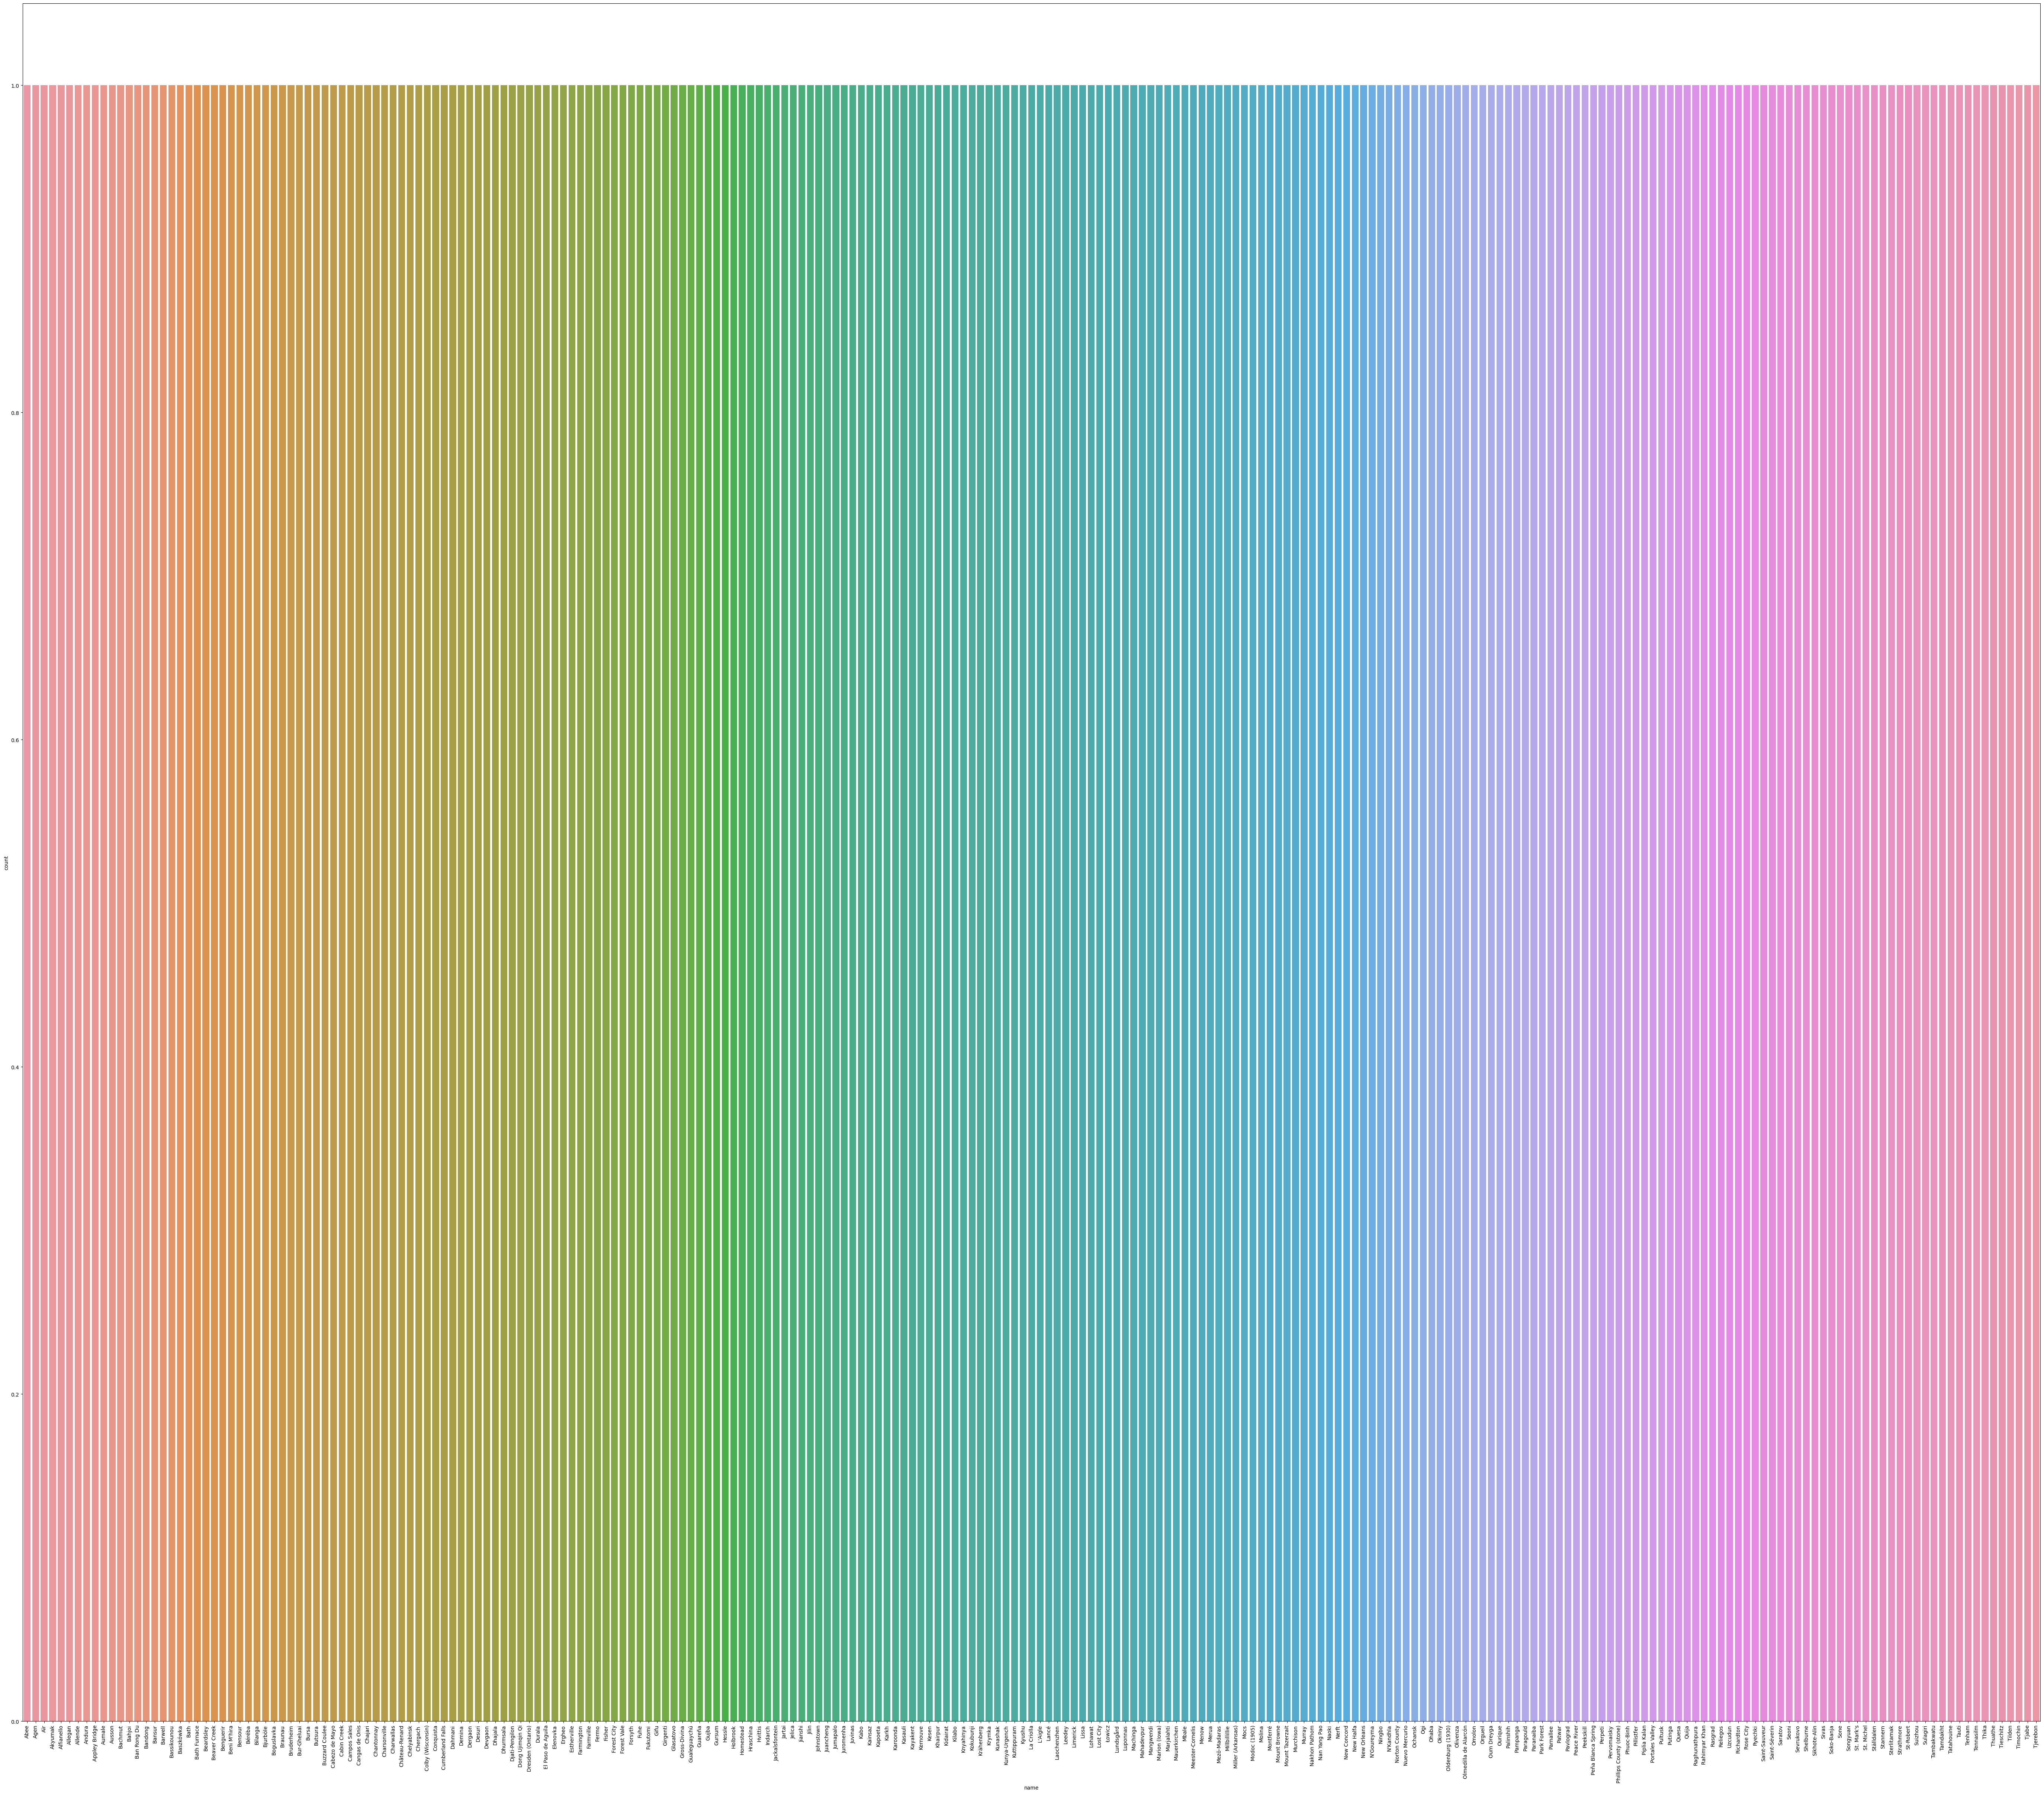

In [306]:
sub_set=dfc[dfc['mass']> 10000 ] #  All those whose mass was more than 10000kg
plt.figure(figsize=(70,60))
sns.countplot(data=sub_set,x='name')
plt.xticks(rotation=90)